In [130]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import json

In [131]:
path = "bill_challenge_datasets"

In [135]:
edges_df = pd.read_csv(path + "/Training/training_graph.csv")
isolated_nodes_df = pd.read_csv(path + "/Training/isolated_nodes.csv")
node_class_df = pd.read_csv(path + "/Training/node_classification.csv")
test_df = pd.read_csv(path + "/Test Dataset/test_edges.csv")
with open(path + "/Training/node_features_text.json") as json_file:
    text = json.load(json_file)

In [136]:
# Compute the unique nodes and number of edges for every node
nodes = set(edges_df.to_numpy().flatten())
nodes = list(nodes)
nodes_count = np.bincount(edges_df.to_numpy().flatten())

# Compute the degree of the nodes 
nodes_deg = []
for node in nodes: 
        nodes_deg.append(nodes_count[node])

graph_df = pd.DataFrame({'Nodes': nodes, "Degrees": nodes_deg})
graph_df = graph_df.join(node_class_df).drop(columns = ["id"])

graph_df = graph_df.set_index("Nodes", drop=True)

In [137]:
graph_df.describe()

,Degrees,page_type
count,20816.000000,20816.000000
mean,12.686203,2.655938
std,21.972630,1.016412
min,1.000000,1.000000
25%,2.000000,2.000000
50%,6.000000,3.000000
75%,14.000000,4.000000
max,577.000000,4.000000


<AxesSubplot:xlabel='Degrees', ylabel='Count'>

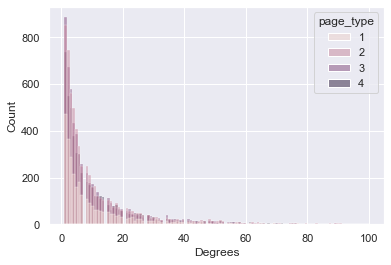

In [138]:
# Since most nodes have a degree below 100 let us only examine those for visualization purposes

graph_df_significant = graph_df[graph_df.Degrees <= 100]
sns.histplot(graph_df_significant, x = "Degrees", hue = "page_type")


In [139]:
def convert_to_one_hot(x): 
        x = np.array(x)
        y = np.zeros((x.size, 5000))
        y[np.arange(x.size), x] = 1
        return y.sum(axis = 0)

# One-hot encoded dictionary such that every ID maps to the 5000-length vector
one_hot_vec_text = {int(key): convert_to_one_hot(value) for key, value in text.items()} 

# Combine the one-hot encoding into one matrix
one_hot_mat = []
for vec in one_hot_vec_text.values(): 
        one_hot_mat.append(vec)
one_hot_matrix = np.array(one_hot_mat)